# Proyecto de Anális de Datos
Proyecto de análisis de datos de siniestros viales de la ciudad de Buenos Aires  
con el fin de generar información que permita a las autoridades locales tomar medidas  
para disminuir la cantidad de víctimas fatales de los siniestros viales acaecidos   
durante el periodo 2016-2021.

## Carga de la data, visualizar primeros registros y función para primeros análisis

In [1]:
import pandas as pd
# import openpyxl
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# abrir los datasets con su extensión original
# df_homicidios = pd.read_excel("datasets/homicidios.xlsx")
# df_victimas = pd.read_excel("datasets/homicidios.xlsx", sheet_name="VICTIMAS")

df_homicidios = pd.read_csv("datasets/homicidios.csv", parse_dates=["FECHA"])
df_victimas = pd.read_csv("datasets/victimas.csv", parse_dates=["FECHA"])

In [3]:
df_homicidios.head(2)

ID  N_VICTIMAS       FECHA  AAAA  MM  DD     HORA HH  \
0  2016-0001           1  01/01/2016  2016   1   1  4:00:00  4   
1  2016-0002           1  02/01/2016  2016   1   2  1:15:00  1   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE             Calle  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  PIEDRA BUENA AV.   
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ    PAZ, GRAL. AV.   

   Altura                                Cruce  \
0     NaN  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1     NaN                  DE LOS CORRALES AV.   

                               Dirección Normalizada  COMUNA  \
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8   
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   

                               XY (CABA)         pos x         pos y  \
0  Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022   
1  Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   

    PARTICIPANTES VICTIMA    ACUSADO  
0       MOTO-AUTO    MOTO       AUTO  
1  AUTO-PASAJEROS    AUTO  PASAJEROS

In [4]:
df_victimas.head()

ID_hecho       FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
0  2016-0001  01/01/2016  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19   
1  2016-0002  02/01/2016  2016   1   2  CONDUCTOR    AUTO  MASCULINO   70   
2  2016-0003  03/01/2016  2016   1   3  CONDUCTOR    MOTO  MASCULINO   30   
3  2016-0004  10/01/2016  2016   1  10  CONDUCTOR    MOTO  MASCULINO   18   
4  2016-0005  21/01/2016  2016   1  21  CONDUCTOR    MOTO  MASCULINO   29   

  FECHA_FALLECIMIENTO  
0          01/01/2016  
1          02/01/2016  
2          03/01/2016  
3                  SD  
4          01/02/2016

In [5]:
# función para obtener datos varios de los dataframe(info, describe, null, duplicated)
def print_df_info(df):

    print("** Info - Información general **")
    print(df.info())

    print("=======================================================")

    print("** Shape **")
    print(f"Filas: {df.shape[0]} - Columnas: {df.shape[1]}")

    print("=======================================================")

    print("** Describe - Estadísticas resumidas **")
    print(df.describe().T)

    print("=======================================================")

    print("** NaN - Nulos **")
    print(df.isna().sum())

    print("=======================================================")
    print("** Duplicated - Duplicados **")
    print(df.duplicated().sum())

In [6]:
# aplicamos la función para obtener información  general
print_df_info(df_homicidios)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 69

**Observaciones**
* Se observan nulos en las columnas "Calle", "Altura", "Cruce" y "Dirección Normalizada".  
* Las columnas no tienen un formato estandar para los nombres.
* Las columnas "XY (CABA)", "pos x" y "pos y", son de tipo object cuando su dato es de tipo numérico
* No se observan duplicados

In [7]:
# aplicamos la función para obtener información  general
print_df_info(df_victimas)

** Info - Información general **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB
None
** Shape **
Filas: 717 - Columnas: 10
** Describe - Estadísticas resumidas **
      count         mean       std     min     25%     50%     75%     max
AAAA  717.0  2018.174338  1.672655  2016.0  2017.0  2018.0  2019.

**Observaciones**
* No se observan nulos
* No se observan duplicados
* Si es complemento del conjunto de datos de homicidios, no concuerdan el número de registros: 696 en homicidios y 717 en victimas

## Transformaciones

**Verificación de nulos**

In [8]:
df_homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [9]:
# observar nulos
df_homicidios[df_homicidios["Calle"].isnull()]
df_homicidios[df_homicidios["Cruce"].isnull()]
df_homicidios[df_homicidios["Dirección Normalizada"].isnull()]
df_homicidios[df_homicidios["Altura"].isnull()]

ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA  HH  \
0    2016-0001           1  01/01/2016  2016   1   1   4:00:00   4   
1    2016-0002           1  02/01/2016  2016   1   2   1:15:00   1   
3    2016-0004           1  10/01/2016  2016   1  10   0:00:00   0   
4    2016-0005           1  21/01/2016  2016   1  21   5:20:00   5   
5    2016-0008           1  24/01/2016  2016   1  24  18:30:00  18   
..         ...         ...         ...   ...  ..  ..       ...  ..   
689  2021-0091           1  11/12/2021  2021  12  11  23:00:00  23   
690  2021-0092           1  12/12/2021  2021  12  12   6:20:00   6   
691  2021-0093           1  13/12/2021  2021  12  13  17:10:00  17   
692  2021-0094           1  20/12/2021  2021  12  20   1:10:00   1   
693  2021-0095           1  30/12/2021  2021  12  30   0:43:00   0   

                               LUGAR_DEL_HECHO TIPO_DE_CALLE  \
0    AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA   
1            AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ   
3        AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA   
4    AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA   
5               AV 27 DE FEBRERO Y AV ESCALADA       AVENIDA   
..                                         ...           ...   
689                    BAIGORRIA Y VICTOR HUGO         CALLE   
690             AV. RIVADAVIA Y AV. PUEYRREDON       AVENIDA   
691                          AV. RIESTRA Y MOM       AVENIDA   
692                    AU DELLEPIANE Y LACARRA     AUTOPISTA   
693                        AV. GAONA Y TERRADA       AVENIDA   

                            Calle  Altura  \
0                PIEDRA BUENA AV.     NaN   
1                  PAZ, GRAL. AV.     NaN   
3                  LARRAZABAL AV.     NaN   
4                    SAN JUAN AV.     NaN   
5               27 DE FEBRERO AV.     NaN   
..                            ...     ...   
689                     BAIGORRIA     NaN   
690                 RIVADAVIA AV.     NaN   
691                   RIESTRA AV.     NaN   
692  DELLEPIANE, LUIS, TTE. GRAL.     NaN   
693                     GAONA AV.     NaN   

                                   Cruce  \
0    FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
1                    DE LOS CORRALES AV.   
3               VILLEGAS, CONRADO, GRAL.   
4                SAENZ PE?A, LUIS, PRES.   
5                           ESCALADA AV.   
..                                   ...   
689                         HUGO, VICTOR   
690                       PUEYRREDON AV.   
691                                  MOM   
692                          LACARRA AV.   
693                              TERRADA   

                                 Dirección Normalizada  COMUNA  \
0    PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8   
1                 PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   
3            LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8   
4              SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1   
5                     27 DE FEBRERO AV. y ESCALADA AV.       8   
..                                                 ...     ...   
689                           BAIGORRIA y HUGO, VICTOR      10   
690                     RIVADAVIA AV. y PUEYRREDON AV.       3   
691                                  RIESTRA AV. y MOM       7   
692         DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.       9   
693                                GAONA AV. y TERRADA      11   

                                   XY (CABA)         pos x         pos y  \
0      Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022   
1      Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
3      Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4    Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   
5     Point (101721.59002217 93844.25656649)  -58.44451316  -34.68475866   
..                                       ...           ...           ...   
689   P

**Observaciones**  
Por la importancia del dataset y el número de datos, como un primer paso se decide imputar el valor SD (Sin Dato)     
en los valores faltantes de las columnas "Calle", "Cruce" y "Dirección Normalizada" y el valor cero(0) en la columna  
"Altura", en posteriores análisis se determinará si se pueden eliminar columnas  
Este valor sin dato (SD), también se puede usar para contar que tantos datos son de este tipo, buscar las causas y  
establecer medidas para mejorar la toma de datos.

In [10]:
# imputar datos
df_homicidios.loc[:, ["Calle", "Cruce", "Dirección Normalizada"]] = df_homicidios.loc[:, ["Calle", "Cruce", "Dirección Normalizada"]].fillna("SD")
df_homicidios.loc[:, "Altura"] = df_homicidios.loc[:, "Altura"].fillna(0)

In [11]:
# verificamos el cambio
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  696 non-null    object 
 11  Altura                 696 non-null    float64
 12  Cruce                  696 non-null    object 
 13  Dirección Normalizada  696 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

Estandarizar todos los nombres de las columnas, ya que hay algunos escritos con mayúsculas o con mayúscula inicial y  
el resto en minúsculas, algunos con mas de un nombre están separados con un espacio, para esto, pasamos todos los nombres  
a minúsculas y reemplazamos los espacios entre nombres con un guión bajo(_)

In [12]:
# pasar nombres de las columnas a minúsculas y separar con guión bajo
print(df_homicidios.columns)

df_homicidios.columns = [col.lower() for col in df_homicidios.columns]
df_homicidios.columns = [col.replace(" ", "_") for col in df_homicidios.columns]
df_homicidios.columns = [col.replace("(", "") for col in df_homicidios.columns]
df_homicidios.columns = [col.replace(")", "") for col in df_homicidios.columns]

df_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'dirección_normalizada', 'comuna', 'xy_caba', 'pos_x', 'pos_y',
       'participantes', 'victima', 'acusado'],
      dtype='object')

In [13]:
# pasar nombres de las columnas a minúsculas
print(df_victimas.columns)

df_victimas.columns = [col.lower() for col in df_victimas.columns]

df_victimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')


Index(['id_hecho', 'fecha', 'aaaa', 'mm', 'dd', 'rol', 'victima', 'sexo',
       'edad', 'fecha_fallecimiento'],
      dtype='object')

Para las columnas "pos_x" y "pos_y", se imputa el valor 0 en las filas donde no exista dato, en algunas filas  
hay un punto(.) para xy_caba según información recopilada, esta columna contiene las mismas coordenadas que "pos_x"  
y "pos_y", por lo cual se decide eliminar la columna "xy_caba".  
Las columnas "pos_x" y "pos_y" deberían ser datos numéricos y los datos de estas columnas son de tipo object, para  
lo cual se decide cambiar el tipo de dato.

In [14]:
# reemplazar los puntos(.) por 0 en las columnas pos_x y pos_y
df_homicidios["pos_x"] = df_homicidios["pos_x"].replace(".", "0")
df_homicidios["pos_y"] = df_homicidios["pos_y"].replace(".", "0")

In [15]:
# cambiar el tipo de dato de las columnas pos_x y pos_y
df_homicidios['pos_x'] = pd.to_numeric(df_homicidios['pos_x'])
df_homicidios['pos_y'] = pd.to_numeric(df_homicidios['pos_y'])

In [16]:
# eliminar la columna xy_caba
df_homicidios.drop(["xy_caba"], axis=1, inplace=True)

In [17]:
# cambio del tipo dato object a datetime en la columna fecha
df_homicidios['fecha'] = pd.to_datetime(df_homicidios['fecha'], format='%d/%m/%Y')

In [18]:
# verifico los cambios de datos
df_homicidios.dtypes

id                               object
n_victimas                        int64
fecha                    datetime64[ns]
aaaa                              int64
mm                                int64
dd                                int64
hora                             object
hh                               object
lugar_del_hecho                  object
tipo_de_calle                    object
calle                            object
altura                          float64
cruce                            object
dirección_normalizada            object
comuna                            int64
pos_x                           float64
pos_y                           float64
participantes                    object
victima                          object
acusado                          object
dtype: object

## Comienzo Análisis Generales
En esta sección se comienza con ver los tipos de datos de las columnas para contar sus valores únicos, establecer  
cuales son categóricas y cuales numéricas y comenzar el análisis general.

In [19]:
# ver tipos de datos de las columnas
df_homicidios.dtypes

id                               object
n_victimas                        int64
fecha                    datetime64[ns]
aaaa                              int64
mm                                int64
dd                                int64
hora                             object
hh                               object
lugar_del_hecho                  object
tipo_de_calle                    object
calle                            object
altura                          float64
cruce                            object
dirección_normalizada            object
comuna                            int64
pos_x                           float64
pos_y                           float64
participantes                    object
victima                          object
acusado                          object
dtype: object

Conteo de los niveles en las diferentes columnas, es decir ver cuantos valores diferentes hay, para  
por ejemplo eliminar columnas que tengan un mismo valor y no aporten información relevante.  
Se realiza sobre columnas categóricas

In [20]:
# arreglo de columnas categóricas (df_homicidios)
cols_cat = [
    'id','hora', 'hh', 'lugar_del_hecho', 'tipo_de_calle', 
    'calle', 'cruce', 'dirección_normalizada',  
    'pos_x', 'pos_y', 'participantes', 'victima', 'acusado'
]

# recorrer el arreglo y contar los valores únicos
for col in cols_cat:
    print(f"Columna {col}: {df_homicidios[col].nunique()} valores únicos")

Columna id: 696 valores únicos
Columna hora: 346 valores únicos
Columna hh: 25 valores únicos
Columna lugar_del_hecho: 683 valores únicos
Columna tipo_de_calle: 4 valores únicos
Columna calle: 280 valores únicos
Columna cruce: 318 valores únicos
Columna dirección_normalizada: 636 valores únicos
Columna pos_x: 605 valores únicos
Columna pos_y: 605 valores únicos
Columna participantes: 41 valores únicos
Columna victima: 10 valores únicos
Columna acusado: 10 valores únicos


**Observación**  
la mayoría de las columnas tienen valores únicos muy altos, lo que sugiere que los siniestros viales suceden en partes y horas diversas

**Generar gráficas individuales para las variables numéricas**  
Para detectar posibles valores atípicos(outliers) del dataframe df_homicidios

In [21]:
# verificar outliers en "n_victimas"    
fig = px.box(df_homicidios, x='n_victimas', points='outliers')
fig.update_layout(
        title='Víctimas', 
        xaxis={
            "title": 'Nro de víctimas',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [22]:
# verificar outliers en "aaaa"(años)
fig = px.box(df_homicidios, x='aaaa', points='outliers')
fig.update_layout(
        title='Años', 
        xaxis={
            "title": 'Años',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [23]:
# verificar outliers en "mm"(meses)
fig = px.box(df_homicidios, x='mm', points='outliers')
fig.update_layout(
        title='Meses', 
        xaxis={
            "title": 'Meses',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [24]:
# verificar outliers en "dd"(días)
fig = px.box(df_homicidios, x='dd', points='outliers')
fig.update_layout(
        title='Días', 
        xaxis={
            "title": 'Días',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [25]:
# verificar outliers en "altura"
fig = px.box(df_homicidios, x='altura', points='outliers')
fig.update_layout(
        title='Altura', 
        xaxis={
            "title": 'Altura',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [26]:
# verificar outliers en "comuna"
fig = px.box(df_homicidios, x='comuna', points='outliers')
fig.update_layout(
        title='Comuna', 
        xaxis={
            "title": 'Comuna',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

**Observación**  
No se observan valores fuera de lo normal, solo en la columna altura se observan valores bastante altos  
el diccionario de datos del dataset solo refiere esta definición:  
Altura: altura de la arteria donde se produjo el hecho, lo que no aporta mayor información

**Generar gráficas individuales para las variables numéricas**  
Para detectar posibles valores atípicos(outliers) del dataframe df_victimas

In [27]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_hecho             717 non-null    object
 1   fecha                717 non-null    object
 2   aaaa                 717 non-null    int64 
 3   mm                   717 non-null    int64 
 4   dd                   717 non-null    int64 
 5   rol                  717 non-null    object
 6   victima              717 non-null    object
 7   sexo                 717 non-null    object
 8   edad                 717 non-null    object
 9   fecha_fallecimiento  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [28]:
# verificar outliers en "aaaa"(año) - df_victimas 
fig = px.box(df_victimas, x='aaaa', points='outliers')
fig.update_layout(
        title='Años', 
        xaxis={
            "title": 'Años',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [29]:
# verificar outliers en "mm"(mes) - df_victimas
fig = px.box(df_victimas, x='mm', points='outliers')
fig.update_layout(
        title='Meses', 
        xaxis={
            "title": 'Meses',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

In [30]:
# verificar outliers en "dd"(días) - df_victimas
fig = px.box(df_victimas, x='dd', points='outliers')
fig.update_layout(
        title='Días', 
        xaxis={
            "title": 'Días',
            "showgrid": True, 
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

**Observación**  
No se detectan valores atípicos en las columnas numéricas del dataframe df_victimas

Graficar los subniveles de cada variable categórica, esto es las cantidades de las diferentes categorías que tiene  
cada columna categórica en el dataframe df_homicidios

Estos valores son generales, es decir todos los del conjunto de datos

In [31]:
# cantidad de tipos de calles
fig = px.bar(df_homicidios, x='tipo_de_calle', color='tipo_de_calle', 
             color_discrete_sequence=['blue', 'red', 'green','purple'], opacity=1,)
fig.update_layout(
    title='Tipos de Calles', 
    xaxis={
        "title": 'Tipo de Calle', 
        "showgrid": True,
    }, 
    yaxis={
        "title": 'Valores', 
        "showgrid": True
    }, 
    legend={
        "orientation": 'v'
    }, 
    paper_bgcolor='#FFFFFF',
)
fig.update_traces(hovertemplate='Tipo de Calle: %{x}<br>Cantidad: %{y}')
fig.show()

In [32]:
# horas de los siniestros
fig = px.bar(df_homicidios, y='hh', color='hh', color_discrete_sequence=['blue'])
fig.update_layout(
        title='Horas de Ocurrencia',
        bargap=0.2,
        width=900, 
        height=800,
        xaxis={
            "title": 'Frecuencia', 
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Horas',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        },
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Cantidad: %{x}<br>Hora: %{y}')
fig.show()

In [33]:
# participantes involucrados en siniestros, tanto víctimas como acusados
fig = px.bar(df_homicidios, y='participantes', color_discrete_sequence=['blue'])
fig.update_layout(
        title='Participantes Involucrados en los Siniestros Viales',
        bargap=0.2,
        width=900, 
        height=900,
        xaxis={
            "title": 'Frecuencia',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Participantes',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Cantidad: %{x}<br>Participantes: %{y}')
fig.show()

In [34]:
# víctimas
fig = px.bar(df_homicidios, y='victima', color='victima')
fig.update_layout(
        title='Victimas por Vehículos en los ültimos Años',
        bargap=0.2,
        width=900, 
        height=900,
        xaxis={
            "title": 'Frecuencia',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Víctimas',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Cantidad: %{x}<br>Vehículo: %{y}')
fig.show()

In [35]:
# acusados
fig = px.bar(df_homicidios, y='acusado', color='acusado')
fig.update_layout(
        title='Acusados a Través de los Años',
        bargap=0.2,
        width=900, 
        height=900,
        xaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Acusados',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Cantidad: %{x}<br>Vehículo: %{y}')
fig.show()

**Observaciones**
* tipo_de_calle: "AVENIDA", es el dato con mas apariciones, puede tomarse como indicativo de mayor ocurrencia de siniestros viales. El dato GENERAL PAZ aunque aparece como avenida en los mapas, no se categoriza en el dataset como tal sino como una categoría aparte.
* hh: Solo destacan las horas 6 y 7 y el resto está mas distribuido uniformemente, aunque se pudiera determinar que las horas 6 y 7 son horas de alto tráfico, las 9, 12 y 18 horas tienen un valor alto también, lo que sugiere mas siniestros en las horas de alto tráfico, aunque esto no se ve claramente en el gráfico.
* participantes: Destacan 4 valores, "PEATON-PASAJEROS", "MOTO-AUTO", "MOTO-CARGAS" Y "PEATON-AUTO", como las apariciones mas frecuentes de involucrados en siniestros viales.
* victima: Los valores "MOTO", "PEATON" y "AUTO", son los datos mas frecuentes. Esto sugiere la alta incidencia de victimas en vehículos de 2 ruedas y de personas a pié(peatones)
* acusado:  La alta aparición de los valores AUTO, PASAJEROS y CARGAS, indica posiblemente que son los mas propensos a generar siniestros viales

**Nota**
Estos análisis de subniveles son a través de todo el conjunto de datos en todas las columnas, esto ayuda a un primer acercamiento  
en cuanto a cantidad de subcategorías y cantidad de apariciones de esas subcategorías, mas adelante se realizarán análisis  
mas específicos, por ejemplo por año.

Graficar los subniveles de cada variable categórica, esto es las diferentes categorías que tiene  
cada columna categórica en el dataframe df_victimas

In [36]:
# victimas en df_victimas
fig = px.bar(df_victimas, x='victima', color='victima')
fig.update_layout(
        title='Víctimas por Año',
        bargap=0.2,
        width=900, 
        height=500,            
        xaxis={
            "title": 'Víctimas',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        },  
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Vehículo: %{x}<br>Cantidad: %{y}')
fig.show()

In [37]:
# sexo de las víctimas
fig = px.bar(df_victimas, x='sexo', color='sexo')
fig.update_layout(
        title='Víctimas Clasificadas por Sexo',
        bargap=0.2,
        width=900, 
        height=500,
        xaxis={
            "title": 'Sexo',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show()

In [38]:
# edad de las víctimas
fig = px.bar(df_victimas, y='edad', color='edad', color_discrete_sequence=['blue'])
fig.update_layout(
        title='Víctimas Clasificadas por Edad',
        bargap=0.2,
        width=900, 
        height=1600,
        xaxis={
            "title": 'Frecuencia',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Edad',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Cantidad: %{x}<br>Edad: %{y}')
fig.show()

**Observaciones**  
Se observa mayor número de victimas del sexo masculino, en victima son los mismos datos del dataframe de homicidios, desde este punto de vista, la edad y el sexo no serían tan relevantes para determinar o clasificar a las victimas, ya que cualquier persona, de cualquier sexo o edad está propensa a ser victima de un siniestro vial, esto no es concluyente ya que si se tiene en cuenta la edad y el sexo, puede ser que los mas jóvenes de sexo masculino, esten mas propensos a ser victimas, así como los adultos mayores, esto es tanto como si tienen o no algún vehículo, se recomienda que cualquier campaña informativa llegue a la mayor parte del público en general.

# Análisis Varios

Distribución de las víctima por año, mes y comuna

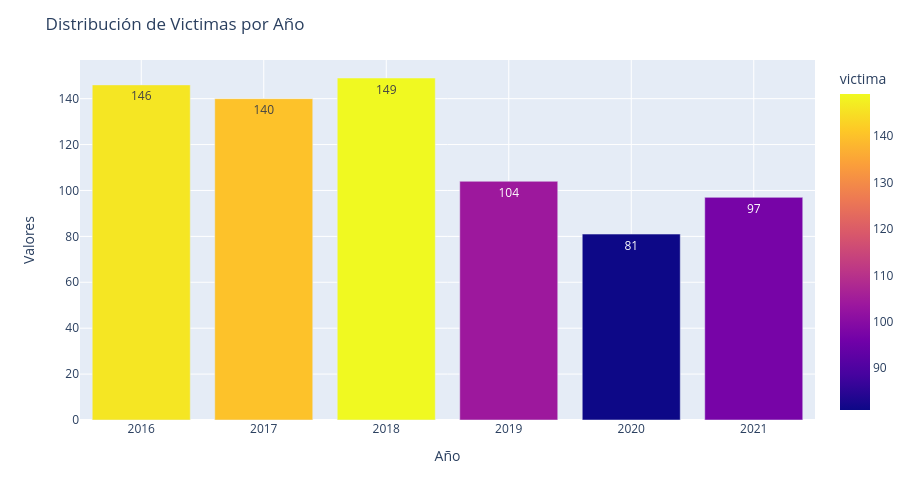

In [39]:
# distribución de víctimas por años
series = df_victimas.groupby('aaaa')['victima'].count()
df3 = pd.DataFrame(series, index=series.index)
fig = px.bar(df3, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Distribución de Victimas por Año',
        # bargap=0.2,
        width=600, 
        height=500,
        xaxis={
            "title": 'Año',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        },  
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

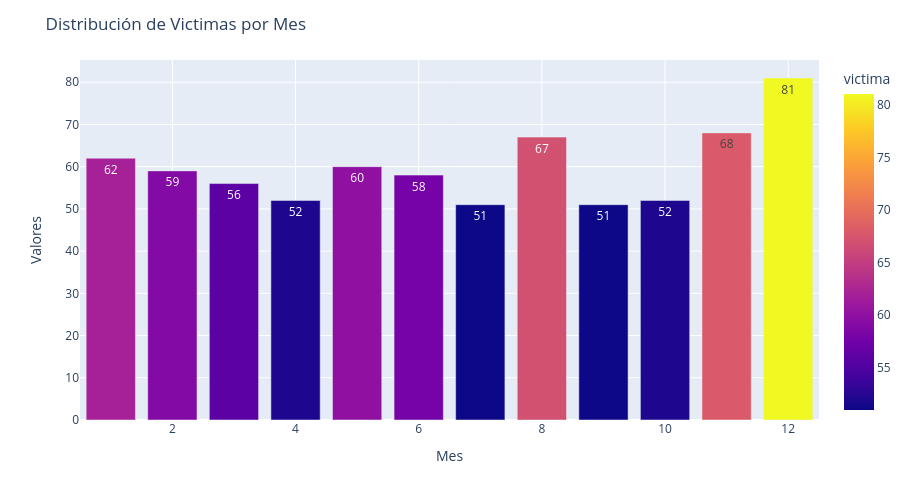

In [40]:
# distribución de víctimas por mes
series = df_victimas.groupby('mm')['victima'].count()
df4 = pd.DataFrame(series, index=series.index)
fig = px.bar(df4, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Distribución de Victimas por Mes',
        # bargap=0.2,
        width=700, 
        height=500,
        xaxis={
            "title": 'Mes',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        },  
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Mes: %{x}<br>Cantidad: %{y}')
fig.show()

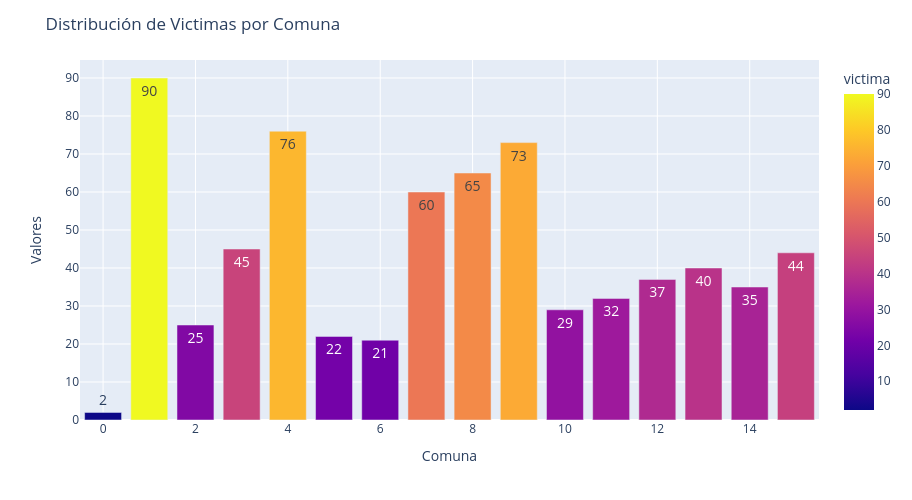

In [41]:
# distribución de víctimas por comuna
series = df_homicidios.groupby('comuna')['victima'].count()
df5 = pd.DataFrame(series, index=series.index)
fig = px.bar(df5, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Distribución de Victimas por Comuna',
        # bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Comuna',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        },  
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Comuna: %{x}<br>Cantidad: %{y}')
fig.show()

**Observaciones**  
* Se observa una tendencia a la baja de siniestros viales con un ligero aumento en los años 2018 y 2021 respecto a los años anteriores
* Agosto, Noviembre y Diciembre sobresalen como los meses con mas siniestros viales
* Las comunas 1, 4, 9, 8, 7 respectivamente, tienen mas apariciones con siniestros viales

# Análisis Varios por Espacios de Tiempo

Análisis de víctimas por año y clasificadas por sexo

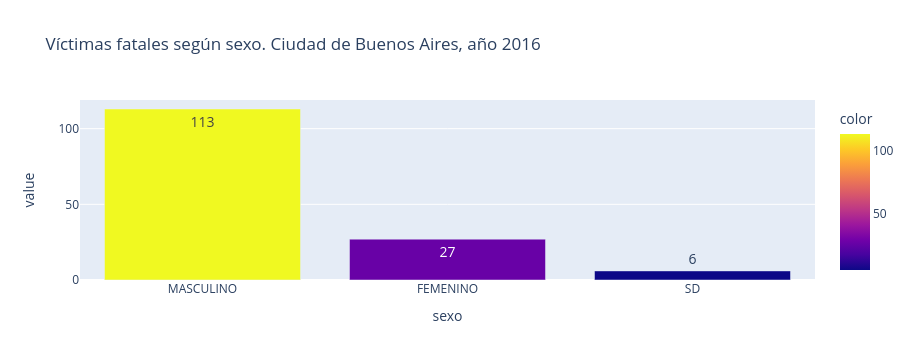

In [42]:
y = df_victimas[df_victimas["aaaa"] == 2016]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2016",
            color = y
            
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show() 

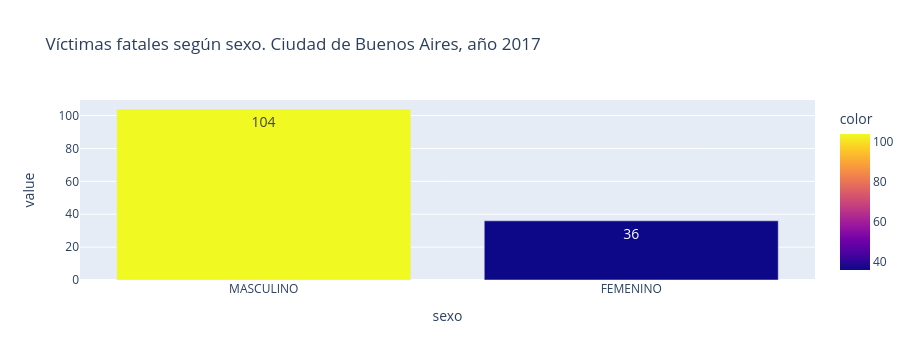

In [43]:
y = df_victimas[df_victimas["aaaa"] == 2017]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2017",
            color = y
            
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show() 

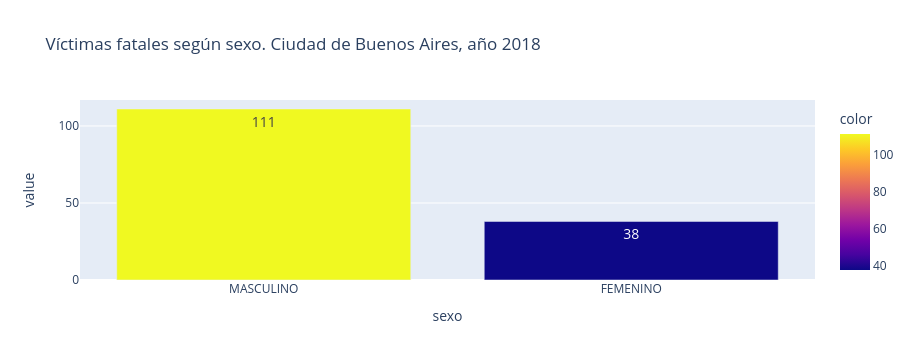

In [44]:
y = df_victimas[df_victimas["aaaa"] == 2018]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2018",
            color = y
            
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show() 

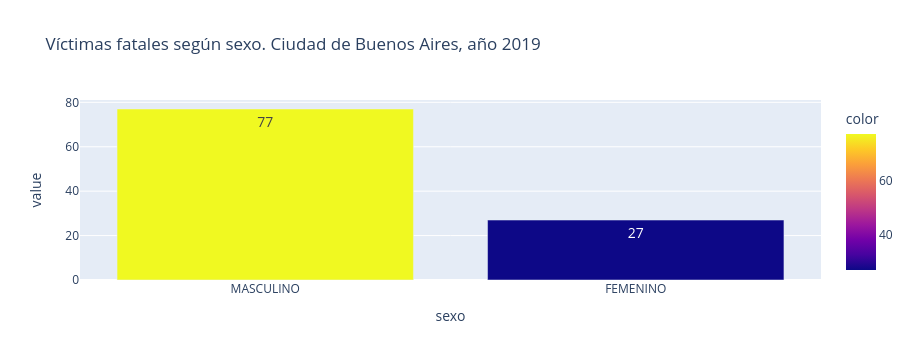

In [45]:
y = df_victimas[df_victimas["aaaa"] == 2019]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2019",
            color = y
            
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show() 

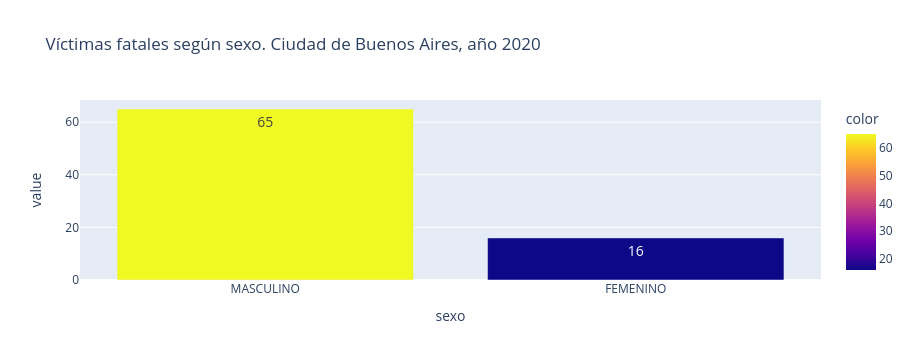

In [46]:
y = df_victimas[df_victimas["aaaa"] == 2020]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2020",
            color = y
            
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show() 

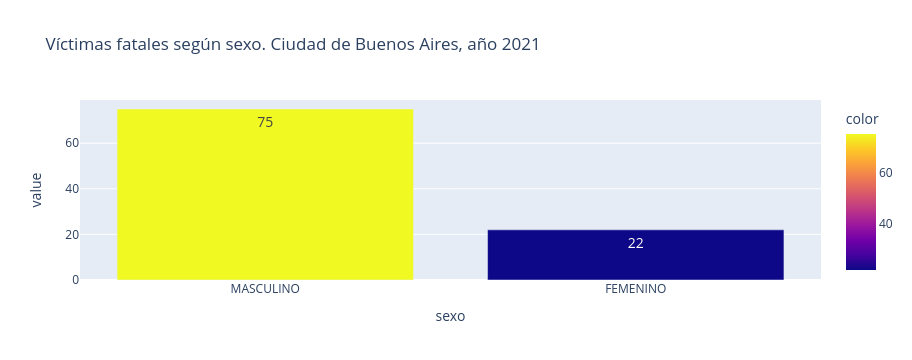

In [47]:
y = df_victimas[df_victimas["aaaa"] == 2021]["sexo"].value_counts()
fig = px.bar(y,
            text_auto = True,
            title = "Víctimas fatales según sexo. Ciudad de Buenos Aires, año 2021",    
            # color = {'MASCULINO': '#30BFDD', 'FEMENINO': '#F7C0BB'}
            color = y
        )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
La tendencia es a la baja, pero igual se considera que el sexo masculino aún tiene  
una alta incidencia en siniestros viales, tanto como víctimas así como acusados

Análisis de víctimas por mes de los años 2020 y 2021

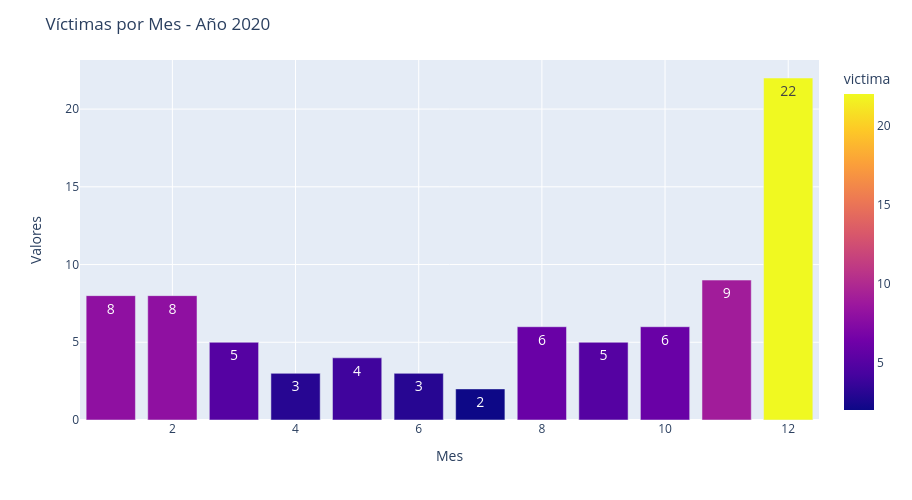

In [48]:
# 2020
series = df_victimas[df_victimas['aaaa'] == 2020].groupby('mm')['victima'].count()
df6 = pd.DataFrame(series, index=series.index)

fig = px.bar(df6, y='victima', color='victima',text_auto = True)
fig.update_layout(
        title='Víctimas por Mes - Año 2020',
        bargap=0.2,
        width=700, 
        height=500,
        xaxis={
            "title": 'Mes',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Mes: %{x}<br>Cantidad: %{y}')
fig.show()

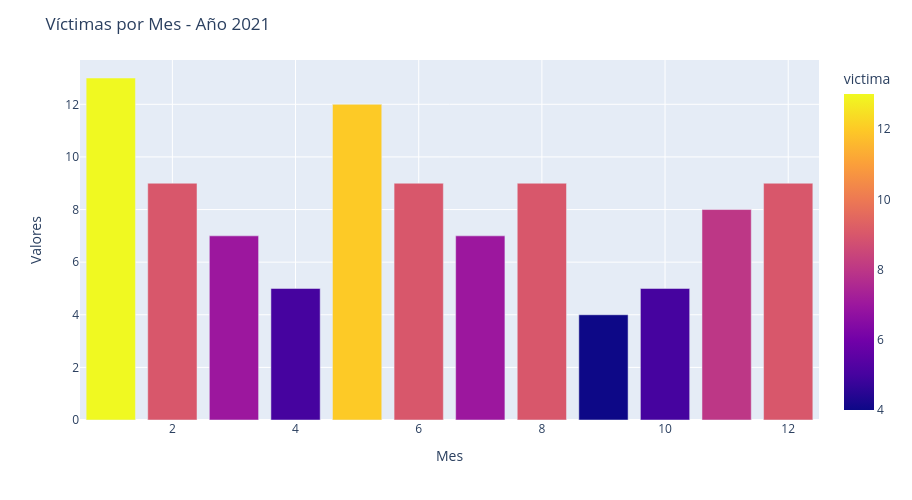

In [49]:
# count victima by mm where aaaa = 2021
series = df_victimas[df_victimas['aaaa'] == 2021].groupby('mm')['victima'].count()
df6 = pd.DataFrame(series, index=series.index)

fig = px.bar(df6, y='victima', color='victima')
fig.update_layout(
        title='Víctimas por Mes - Año 2021',
        bargap=0.2,
        width=700, 
        height=500,
        xaxis={
            "title": 'Mes',
            "showgrid": True
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Mes: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**
Aumento de siniestros en casi todos los meses a excepción del mes 12(Diciembre), esto  
en comparación con el año 2020

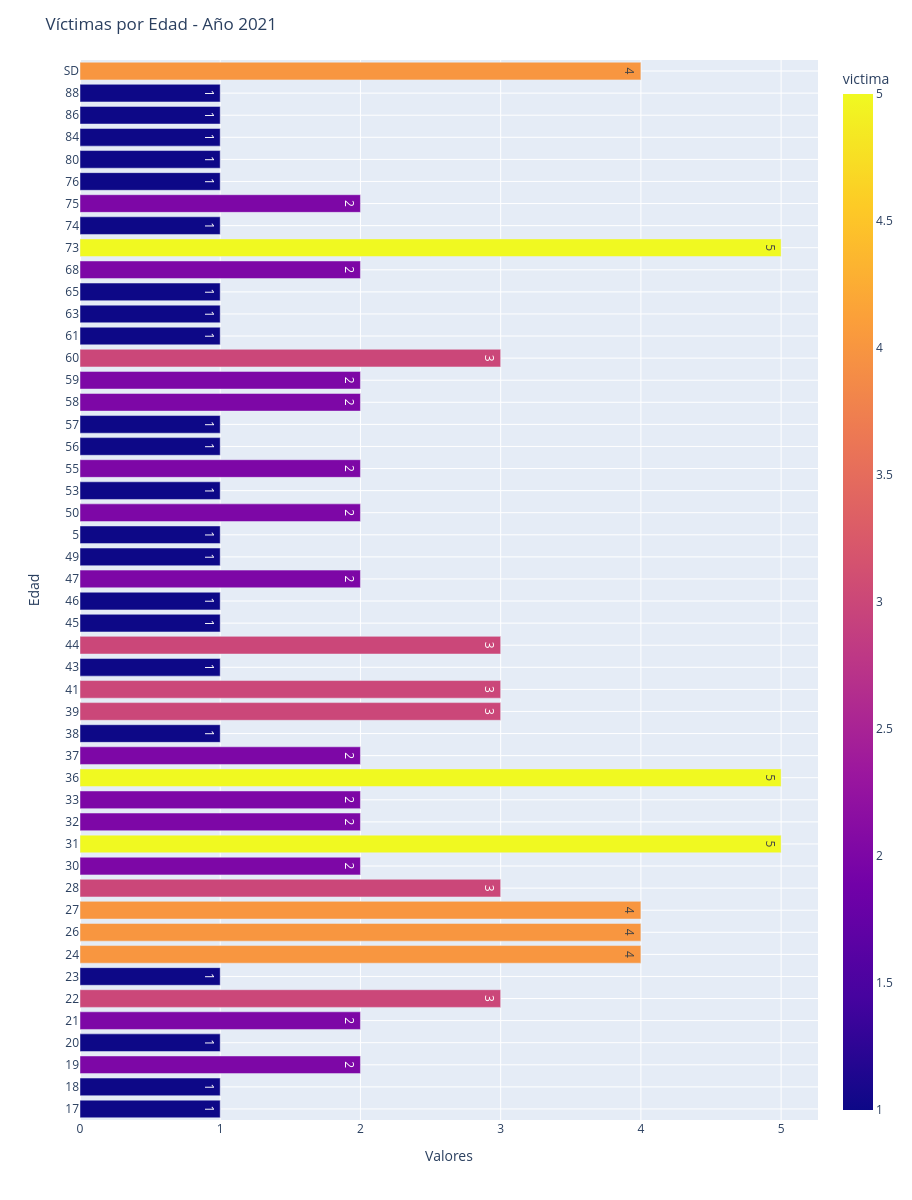

In [50]:
# victimas por edad para el año 2021
series = df_victimas[df_victimas['aaaa'] == 2021].groupby('edad')['victima'].count()
df7 = pd.DataFrame(series, index=series.index)

fig = px.bar(df7, x='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Víctimas por Edad - Año 2021',
        bargap=0.2,
        width=900, 
        height=1200,
        xaxis={
            "title": 'Valores',
            "showgrid": True,
        }, 
        yaxis={
            "title": 'Edad',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

**Observación**  
Se observa un rango de 24 - 44 años con mayor concentración de víctimas

Víctimas clasificadas por rol años 2020 y 2021

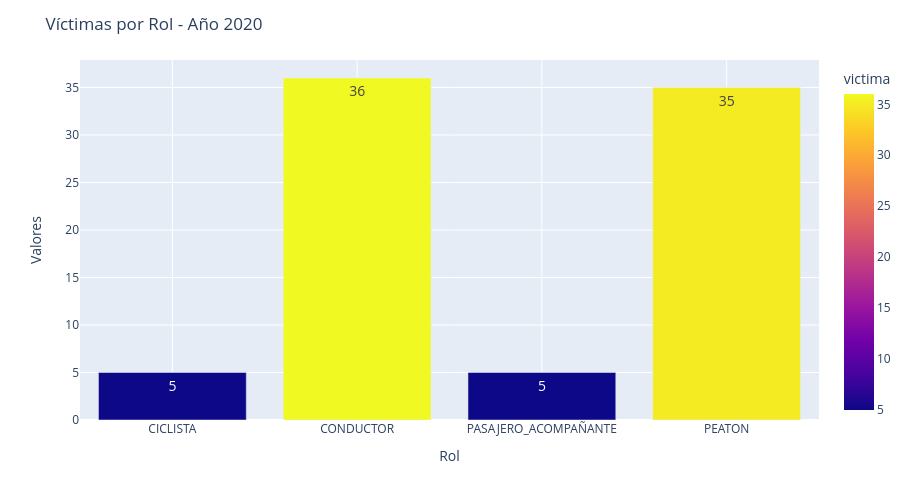

In [51]:
# victimas por rol para el año 2020
series = df_victimas[df_victimas['aaaa'] == 2020].groupby('rol')['victima'].count()
df8 = pd.DataFrame(series, index=series.index)

fig = px.bar(df8, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Víctimas por Rol - Año 2020',
        bargap=0.2,
        width=700, 
        height=500,
        xaxis={
            "title": 'Rol',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Rol: %{x}<br>Cantidad: %{y}')
fig.show()

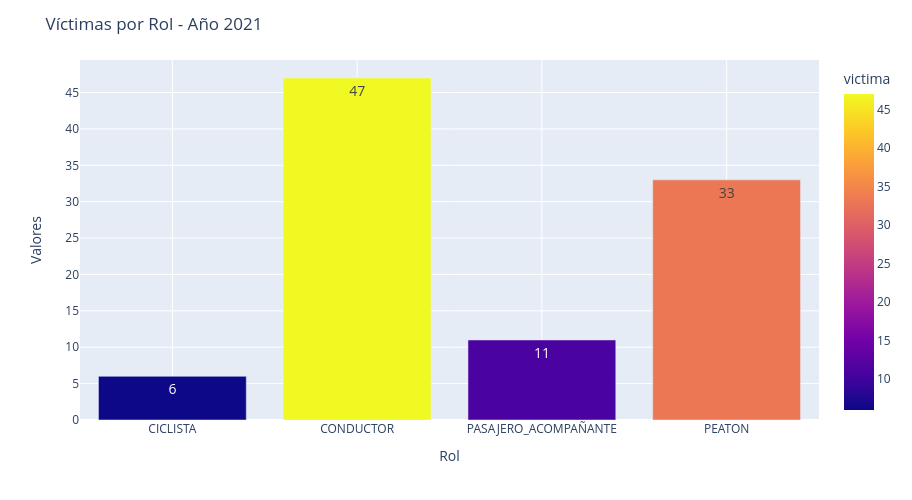

In [52]:
# victimas por rol para el año 2021
series = df_victimas[df_victimas['aaaa'] == 2021].groupby('rol')['victima'].count()
df8 = pd.DataFrame(series, index=series.index)

fig = px.bar(df8, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Víctimas por Rol - Año 2021',
        bargap=0.2,
        width=700, 
        height=500,
        xaxis={
            "title": 'Rol',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Rol: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Los roles de conductor y peatón, son los que tienen la mas alta incidencia  
en siniestros viales, con un leve descenso para el año 2021 en el rol de peatón

Recuento de víctimas para los años 2020 y 2021

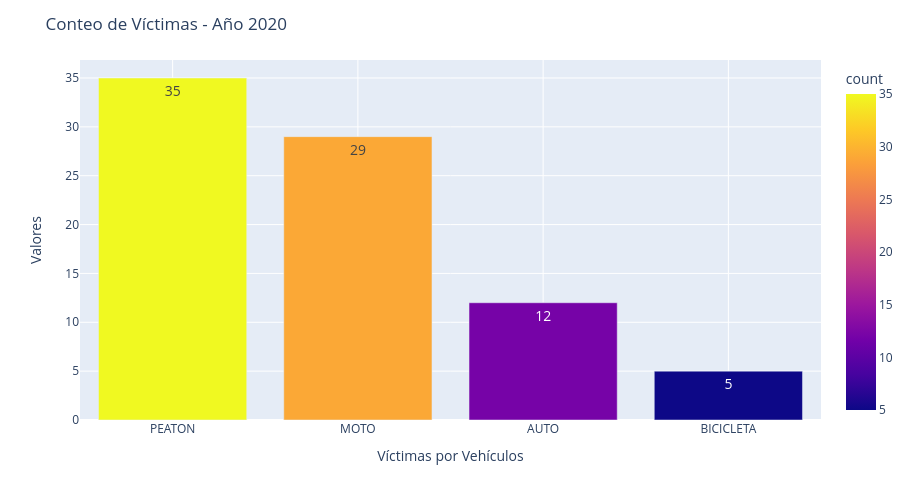

In [53]:
# conteo de victimas para el año 2020
series = df_victimas[df_victimas['aaaa'] == 2020]['victima'].value_counts()
df9= pd.DataFrame(series, index=series.index)

fig = px.bar(df9, y='count', color='count', text_auto = True)
fig.update_layout(
        title='Conteo de Víctimas - Año 2020',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Víctimas por Vehículos',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Víctima: %{x}<br>Cantidad: %{y}')
fig.show()

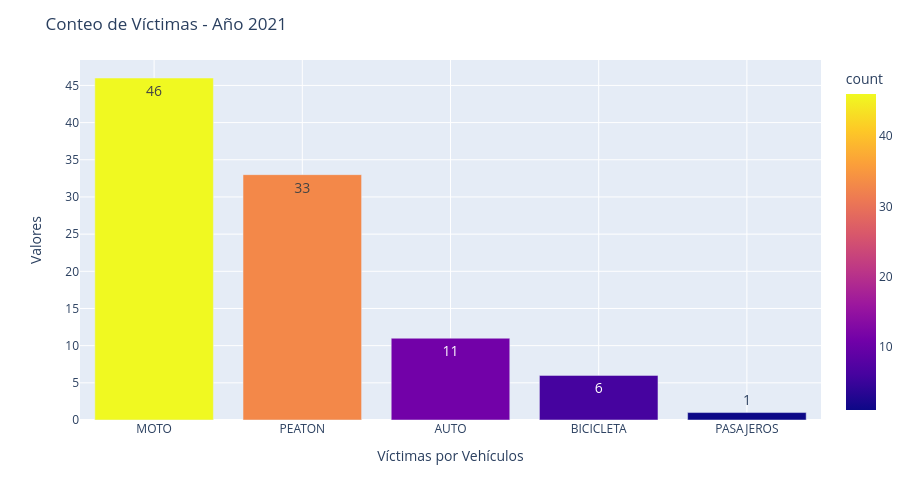

In [54]:
# conteo de victimas para el año 2021
series = df_victimas[df_victimas['aaaa'] == 2021]['victima'].value_counts()
df9= pd.DataFrame(series, index=series.index)

fig = px.bar(df9, y='count', color='count', text_auto = True)
fig.update_layout(
        title='Conteo de Víctimas - Año 2021',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Víctimas por Vehículos',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(textfont_size = 14, textangle = 0, hovertemplate='Víctimas: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**
Las victimas en motos y peatones siguen como las mas frecuentes en los dos  
últimos años, para el año 2020 los peatones eran los mas afectados, para el  
2021 se intercambia el primer puesto con las motos quedando los peatones en  
segundo lugar

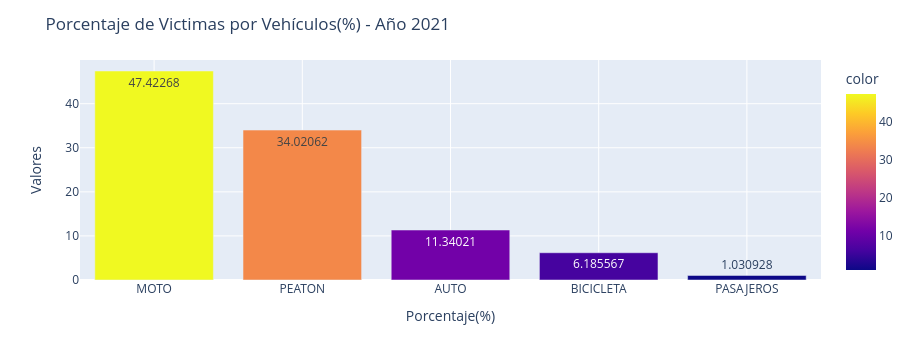

In [55]:
# porcentaje de victimas para el año 2021
df_victimas_2021 = df_victimas[df_victimas['aaaa'] == 2021]
percentage = df_victimas_2021['victima'].value_counts(normalize=True) * 100

fig = px.bar(percentage, color=percentage, text_auto = True)
fig.update_layout(
        title='Porcentaje de Victimas por Vehículos(%) - Año 2021', 
        xaxis={
            "title": 'Porcentaje(%)',
            "showgrid": True, 
        }, 
        yaxis={
            "title": 'Valores',
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Víctima: %{x}<br>Cantidad: %{y}')
fig.show()

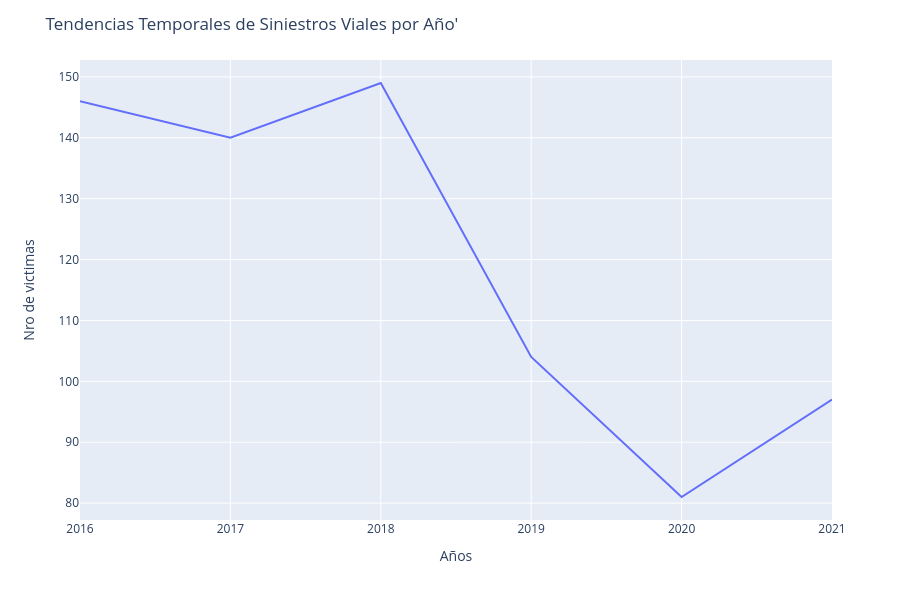

In [56]:
# count of victima by aaaa
series = df_victimas.groupby('aaaa')['victima'].count()
df3 = pd.DataFrame(series, index=series.index)

fig = px.line(df3, y='victima', line_shape='linear')
fig.update_layout(
        title="Tendencias Temporales de Siniestros Viales por Año'",bargap=0.2,
        width=900, 
        height=600, 
        xaxis={
            "title": 'Años', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Nro de victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
La tendencia anual es a la baja, con un leve incremento en 2018 y un incremento un  
poco mas marcado en 2021

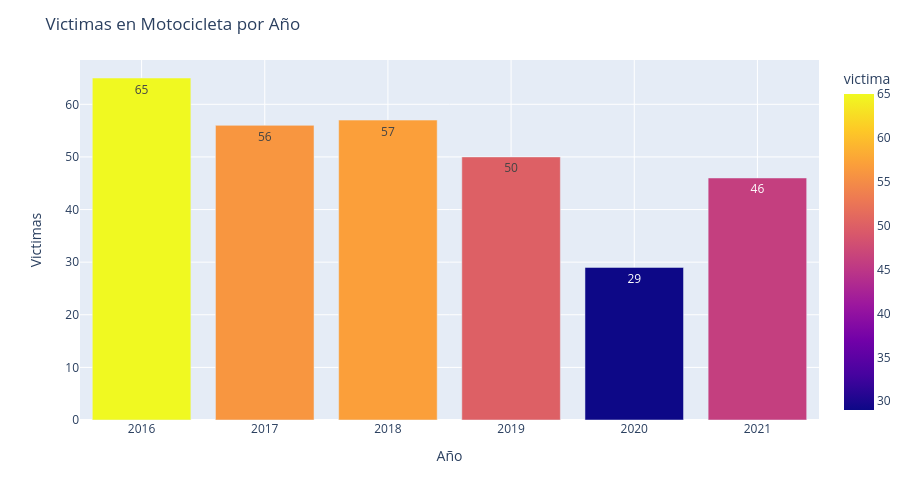

In [57]:
# recuento de victimas en motos por años 
series = df_victimas[df_victimas['victima'] == 'MOTO'].groupby('aaaa')['victima'].count()
df4 = pd.DataFrame(series, index=series.index)

fig = px.bar(df4, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Victimas en Motocicleta por Año',
        bargap=0.2,
        width=900, 
        height=500,
        xaxis={
            "title": 'Año', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Tendencia a la baja con un aumento en 2021 con respecto al año anterior

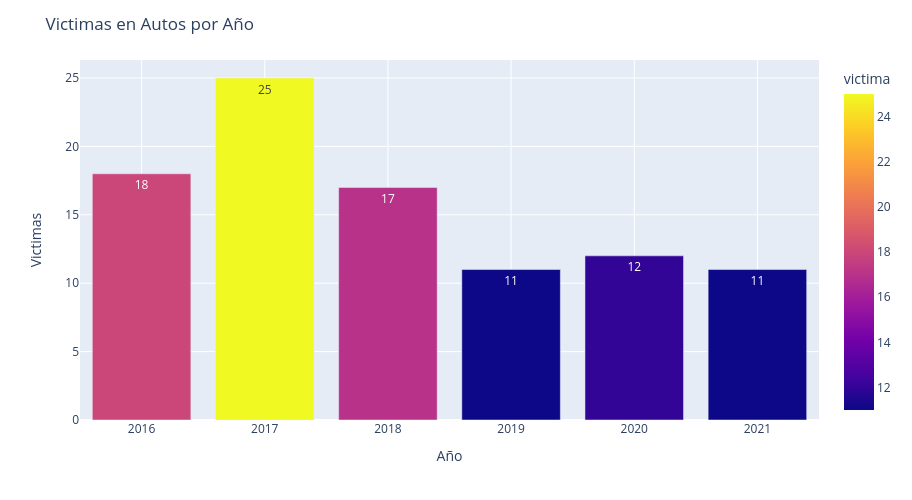

In [58]:
# recuento de victimas en autos por años
series = df_victimas[df_victimas['victima'] == 'AUTO'].groupby('aaaa')['victima'].count()
df4 = pd.DataFrame(series, index=series.index)

fig = px.bar(df4, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Victimas en Autos por Año',
        bargap=0.2,
        width=900, 
        height=500,
        xaxis={
            "title": 'Año', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Tendencia a la baja, número de víctimas estable en los tres últimos años

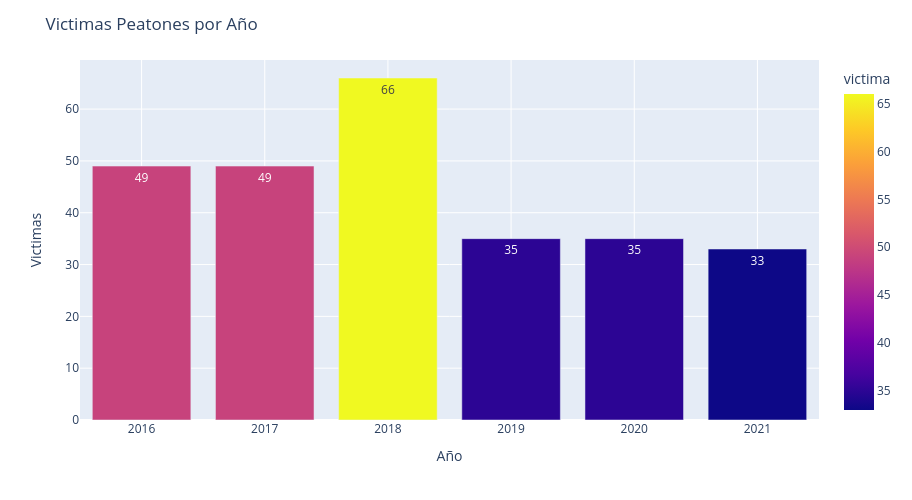

In [59]:
# recuento de victimas peatones por años
series = df_victimas[df_victimas['victima'] == 'PEATON'].groupby('aaaa')['victima'].count()
df4 = pd.DataFrame(series, index=series.index)

fig = px.bar(df4, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Victimas Peatones por Año',
        bargap=0.2,
        width=900, 
        height=500,
        xaxis={
            "title": 'Año', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Tendencia a la baja, número de víctimas estable en los tres últimos años

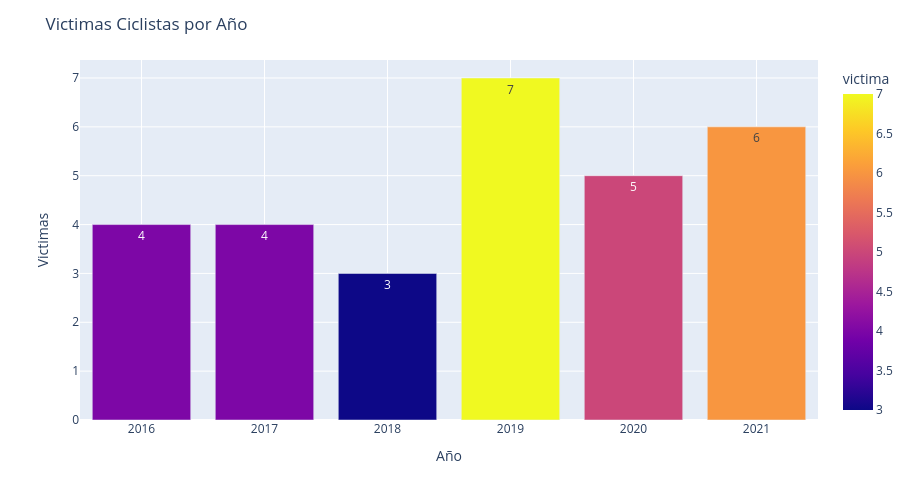

In [60]:
# recuento de victimas ciclistas por años
series = df_victimas[df_victimas['victima'] == 'BICICLETA'].groupby('aaaa')['victima'].count()
df4 = pd.DataFrame(series, index=series.index)

fig = px.bar(df4, y='victima', color='victima', text_auto = True)
fig.update_layout(
        title='Victimas Ciclistas por Año',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Año', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Año: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Leve tendencia al alza, número de víctimas en aumento en los dos últimos años

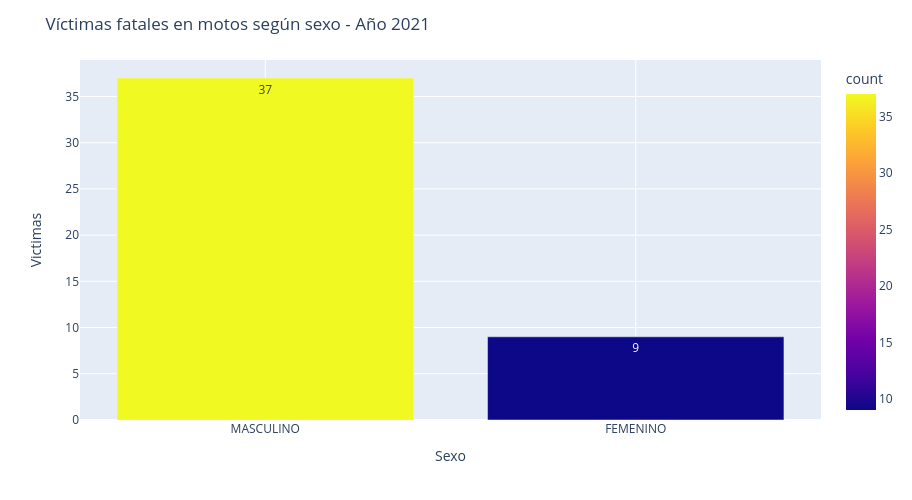

In [61]:
# recuento de victimas en moto clasificados por sexo año 2021
series = df_victimas[df_victimas['victima'] == 'MOTO'][df_victimas['aaaa'] == 2021]['sexo'].value_counts()
df5 = pd.DataFrame(series, index=series.index)

fig = px.bar(df5, y='count', color='count', text_auto = True)
fig.update_layout(
        title='Víctimas fatales en motos según sexo - Año 2021',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Sexo', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Victimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Sexo: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
Predominancia del sexo masculino como víctimas en motos

Recuento de víctimas por tipo de calle

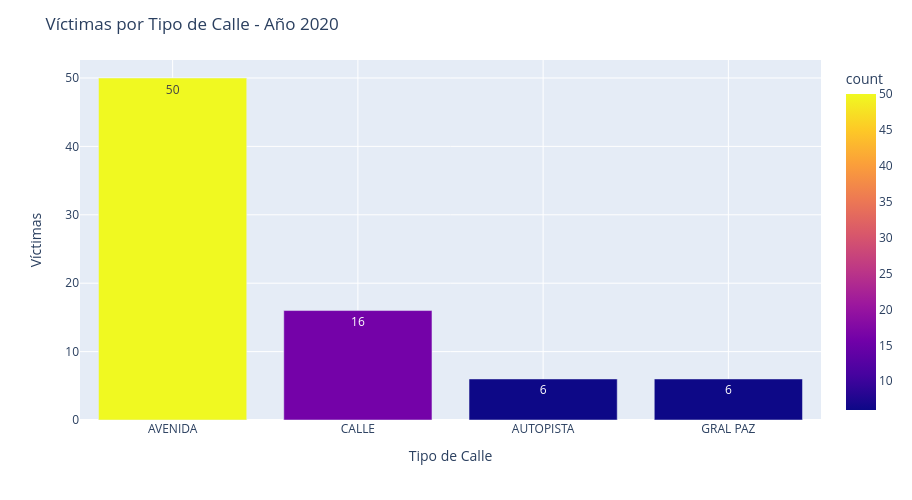

In [62]:
# recuento de víctimas por tipo de calle año 2020
series = df_homicidios[df_homicidios['aaaa'] == 2020]['tipo_de_calle'].value_counts()
df3 = pd.DataFrame(series, index=series.index)

fig = px.bar(df3, y='count', color='count', text_auto = True)
fig.update_layout(
        title='Víctimas por Tipo de Calle - Año 2020',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Tipo de Calle', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Víctimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Tipo de calle: %{x}<br>Cantidad: %{y}')
fig.show()

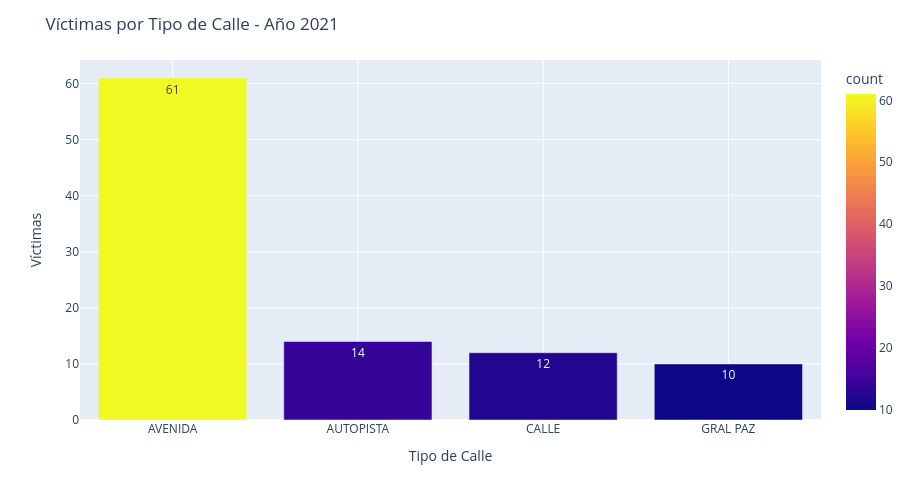

In [64]:
# recuento de víctimas por tipo de calle año 2021
series = df_homicidios[df_homicidios['aaaa'] == 2021]['tipo_de_calle'].value_counts()
df3 = pd.DataFrame(series, index=series.index)

fig = px.bar(df3, y='count', color='count', text_auto = True)
fig.update_layout(
        title='Víctimas por Tipo de Calle - Año 2021',
        bargap=0.2,
        width=800, 
        height=500,
        xaxis={
            "title": 'Tipo de Calle', 
            "showgrid": True
        }, 
        yaxis={
            "title": 'Víctimas', 
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.update_traces(hovertemplate='Tipo de calle: %{x}<br>Cantidad: %{y}')
fig.show()

**Observación**  
El tipo de calle avenida, predomina como la categoría con mas siniestros viales  
en los dos últimos años, con un aumento en el número de víctimas para el 2021